In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [ ]:
df_train=pd.read_csv('/content/train.csv')
df_test=pd.read_csv('/content/train.csv')

In [ ]:
df_train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
df_test.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
df_train.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [ ]:
df_train.dropna(inplace=True)

In [ ]:
df_train.isnull().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

In [ ]:
df_test.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [ ]:
df_test.dropna(inplace=True)

<Axes: xlabel='sentiment', ylabel='Count'>

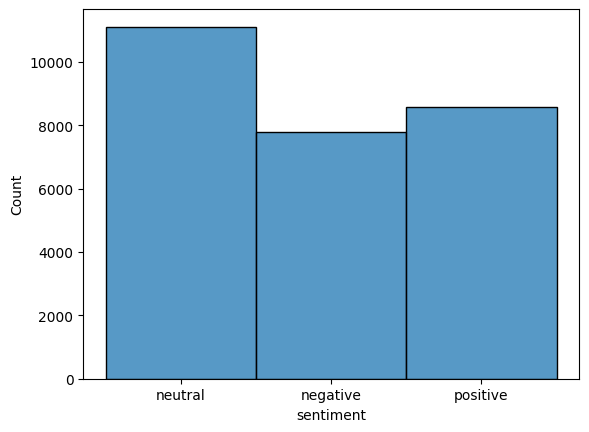

In [ ]:
sns.histplot(df_train['sentiment'])

In [ ]:
import re
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df_train['text'] = df_train['text'].apply(lambda x:clean_text(x))
df_train['selected_text'] = df_train['selected_text'].apply(lambda x:clean_text(x))


In [ ]:
df_train.drop(['textID'],axis=1,inplace=True)
df_test.drop(['textID'],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_train = df_train.apply(le.fit_transform)
df_test = df_test.apply(le.fit_transform)

In [ ]:
df_train

,text,selected_text,sentiment
0,5549,9198,1
1,8875,16388,0
2,21469,2421,0
3,10544,11658,0
4,8870,16366,0
...,...,...,...
27476,10769,3219,0
27477,6376,238,0
27478,10945,20307,2
27479,2266,2509,2


In [ ]:
X=df_train.drop('sentiment',axis=1)
Y=df_train['sentiment']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
reg = LinearRegression()
reg_model = reg.fit(X_train, Y_train)
lr_pred = reg.predict(X_test)

In [ ]:
MSE=mean_squared_error(Y_test,lr_pred)
MAE=mean_absolute_error(Y_test,lr_pred)
r2=r2_score(Y_test,lr_pred)
RMSE = np.sqrt(MSE)
print("R squared value: ", r2)
print("Root Mean Squared Error : ", RMSE)
print("Mean Absolute Error : ", MAE)

R squared value:  0.009970863945771291
Root Mean Squared Error :  0.7697845007197532
Mean Absolute Error :  0.6257212480901526


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)
RandomForestRegressor()
Y_pred_rf=rf.predict(X_test)
print("R squared value: ",r2_score(Y_test, Y_pred_rf))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(Y_test, Y_pred_rf)))
print("Mean Absolute Error : ",mean_absolute_error(Y_test, Y_pred_rf))

R squared value:  0.34621473184408347
Root Mean Squared Error :  0.6255510245809511
Mean Absolute Error :  0.41225867297428437


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0)
gbr_model = gbr.fit(X_train, Y_train)
gbr_model_pred = gbr_model.predict(X_test)

In [ ]:
MSE=mean_squared_error(Y_test,gbr_model_pred)
MAE=mean_absolute_error(Y_test,gbr_model_pred)
r2=r2_score(Y_test,gbr_model_pred)
RMSE = np.sqrt(MSE)
print("R squared value: ", r2)
print("Root Mean Squared Error : ", RMSE)
print("Mean Absolute Error : ", MAE)

R squared value:  0.27811180590457607
Root Mean Squared Error :  0.6573249911687437
Mean Absolute Error :  0.5265024679357936
